In [118]:
import pandas as pd
from sklearn.cluster import KMeans

In [119]:
df = pd.read_csv('Unit06 weatherAUS.csv')

df.head()


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [120]:
df['RainToday'] = pd.factorize(df['RainToday'])[0]
df = df.dropna(axis=0)
X = df.drop(labels=['RainTomorrow'], axis=1)

In [121]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

,n_clusters,6
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [122]:
clusters = kmeans.labels_  # array of 0,1,2 assigning each point to a cluster
df['cluster'] = clusters
print(df.head())


   MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     13.4     22.9       0.6           44.0          20.0          24.0   
1      7.4     25.1       0.0           44.0           4.0          22.0   
2     12.9     25.7       0.0           46.0          19.0          26.0   
3      9.2     28.0       0.0           24.0          11.0           9.0   
4     17.5     32.3       1.0           41.0           7.0          20.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0         71.0         22.0       1007.7       1007.1     16.9     21.8   
1         44.0         25.0       1010.6       1007.8     17.2     24.3   
2         38.0         30.0       1007.6       1008.7     21.0     23.2   
3         45.0         16.0       1017.6       1012.8     18.1     26.5   
4         82.0         33.0       1010.8       1006.0     17.8     29.7   

   RainToday RainTomorrow  cluster  
0          0           No        1  
1          0      

In [123]:

print(pd.crosstab(df['RainTomorrow'], df['cluster']))

cluster           0      1     2      3      4      5
RainTomorrow                                         
No            18257  25518  9829  14430   5043  20326
Yes            4724   1421  4797    930  11178   3137


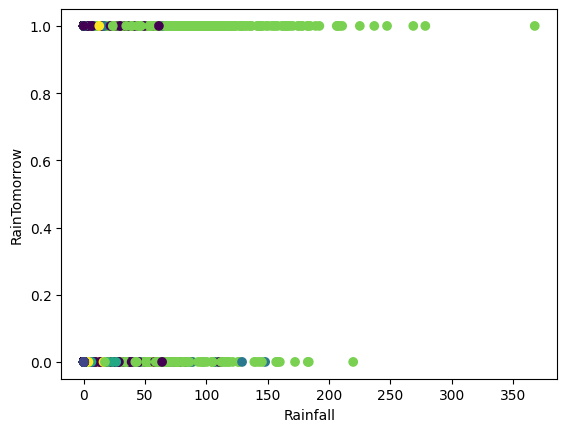

In [124]:

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

y = df['RainTomorrow'].map({'No': 0, 'Yes': 1}).values

plt.scatter(df['Rainfall'], y, c=clusters, cmap='viridis')
plt.xlabel('Rainfall')
plt.ylabel('RainTomorrow')
plt.show()